In [8]:
import soundfile as sf
data1,samplerate = sf.read('/Users/hyh/Desktop/Test Files/Postfiltered/postfiltered_2020-01-08_09_25_03_2.raw', 
               channels=4, 
               samplerate=16000,
               subtype='PCM_16'
              )
data2,samplerate = sf.read('/Users/hyh/Desktop/Test Files/Postfiltered/postfiltered_2020-01-08_09_25_03_3.raw', 
               channels=4, 
               samplerate=16000,
               subtype='PCM_16'
              )

In [8]:
from scipy import signal
corr1 = signal.correlate(data1[:,0],data1[:,0],method='fft')/len(data1[:,0])

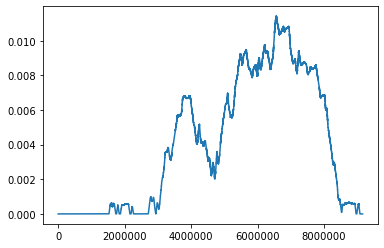

In [6]:
corr2 = signal.correlate(data1[:,0],data1[:,1],method='fft')/len(data1[:,0])
plt.plot(corr2)
plt.show()

In [3]:
# FFT & Normalization
import numpy as np
fft1 = np.fft.fft(data1[:,0],n=1024, norm=None)
fft2 = np.fft.fft(data2[:,0],n=1024, norm=None)

In [87]:
# Truncate signal, based on the signal that has the shorter length
def truncate(sig1, sig2):
    l1, l2 = len(sig1), len(sig2)
    if l1 <= l2:
        return sig1, sig2[0:l1]
    else:
        return sig1[0:l2], sig2

# PHAT Transfrorm 
def phatTransform(sig1, sig2, windowDuration, Fs, ):
    # Fs: Sampling Frequency
    # WindowDuration: the length of moving window in time (s)
    l = windowDuration * Fs
    N = len(sig1)
    # Padding
    if N%l != 0:
        padWidth = l-N%l
        sig1 = np.pad(sig1, (0, padWidth), 'constant', constant_values = 0)
        sig2 = np.pad(sig2, (0, padWidth), 'constant', constant_values = 0)
    numOfWindows = len(sig1)/l
    for i in range(0,numOfWindows):
        sig1Temp, sig2Temp = sig1[i*l:l*(i+1)], sig2[i*l:l*(i+1)]
        Fsig1 = np.fft.fft(sig1Temp)
        Fsig2 = np.fft.fft(sig2Temp)
        # Normalize magnitude to 1
        phat1 = np.exp(1j*np.angle(Fsig1))
        phat2 = np.exp(1j*np.angle(Fsig2))
        # Element wise multiplication
        product = np.multiply(phat1, phat2)
        # Inverse fourier transform
        IFFT = np.abs(np.fft.ifft(product))
        # Statistics
        maxValue, argmax, mean, std = max(IFFT), np.argmax(IFFT), np.mean(IFFT), np.std(IFFT)
        significance = (maxValue - mean) / std
        normalized = (IFFT-mean)/std
    

In [88]:
import numpy as np

# Truncate signal, based on the signal that has the shorter length
def truncate(sig1, sig2):
    l1, l2 = len(sig1), len(sig2)
    if l1 <= l2:
        return sig1, sig2[0:l1]
    else:
        return sig1[0:l2], sig2
    
sig1, sig2 = truncate(data1[:,0], data2[:,1])

windowDuration, Fs = 1, 16000
l = windowDuration * Fs
N = len(sig1)
# Padding
if N%l != 0:
    padWidth = l-N%l
    sig1 = np.pad(sig1, (0, padWidth), 'constant', constant_values = 0)
    sig2 = np.pad(sig2, (0, padWidth), 'constant', constant_values = 0)
    
numOfWindows = len(sig1)/l
for i in range(99,100):
    sig1Temp, sig2Temp = sig1[i*l:l*(i+1)], sig2[i*l:l*(i+1)]
    Fsig1 = np.fft.fft(sig1Temp)
    Fsig2 = np.fft.fft(sig2Temp)
    
    phat1 = np.exp(1j*np.angle(Fsig1))
    phat2 = np.exp(1j*np.angle(Fsig2))
    
    product = np.multiply(phat1, phat2)
    IFFT = np.abs(np.fft.ifft(product))
    
maxValue, argmax, mean, std = max(IFFT), np.argmax(IFFT), np.mean(IFFT), np.std(IFFT)
significance = (maxValue - mean) / std
normalized = (IFFT-mean)/std    

In [90]:
significance

80.92499330938445

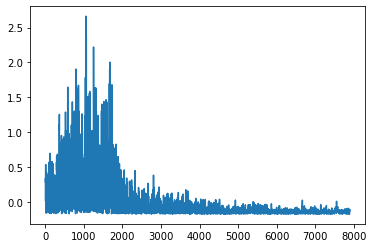

In [86]:
import matplotlib.pyplot as plt
plt.plot(normalized[100:8000])